# High Dimensional Data Visualization

We will use the following algorithms for dimensionality reduction and visualization of high dimentional data:

   - t-Distributed Stochastic Neighbor Embedding (t-SNE)
   - Uniform Manifold Approximation and Projection (UMAP)
   - Principal Component Analysis (PCA)
   
## Reference

1. [McInnes, L, Healy, J, UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction, ArXiv e-prints 1802.03426, 2018](https://arxiv.org/abs/1802.03426)
1. [L.J.P. van der Maaten and G.E. Hinton. Visualizing High-Dimensional Data Using t-SNE. Journal of Machine Learning Research 9(Nov):2579-2605, 2008.](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf)
   
## Navigation

1. [Data](#Data)

In [9]:
import pandas as pd
import numpy as np
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
%matplotlib notebook

## Data

[Top](#Navigation)

We use the "Human Activity Recognition Using Smartphone" [dataset](https://www.kaggle.com/shikhardhwaj/human-activity-recognition-using-smartphone/data). For this exercise we will only consider the 7352 on 563 train dataset.

In [3]:
data = pd.read_csv("data/har-train.csv")
print(data.shape)
data.head()

(7352, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
X = data.loc[:, ~data.columns.isin(['subject', 'Activity'])].copy()
y = data.Activity.copy()
del data

## PCA

[Top](#Navigation)

In [17]:
n_components = 3
pca = PCA(n_components = n_components)
pca_data = pd.DataFrame(pca.fit_transform(X), 
                        columns=['pca_%d' % (i+1) for i in range(n_components)])

<IPython.core.display.Javascript object>


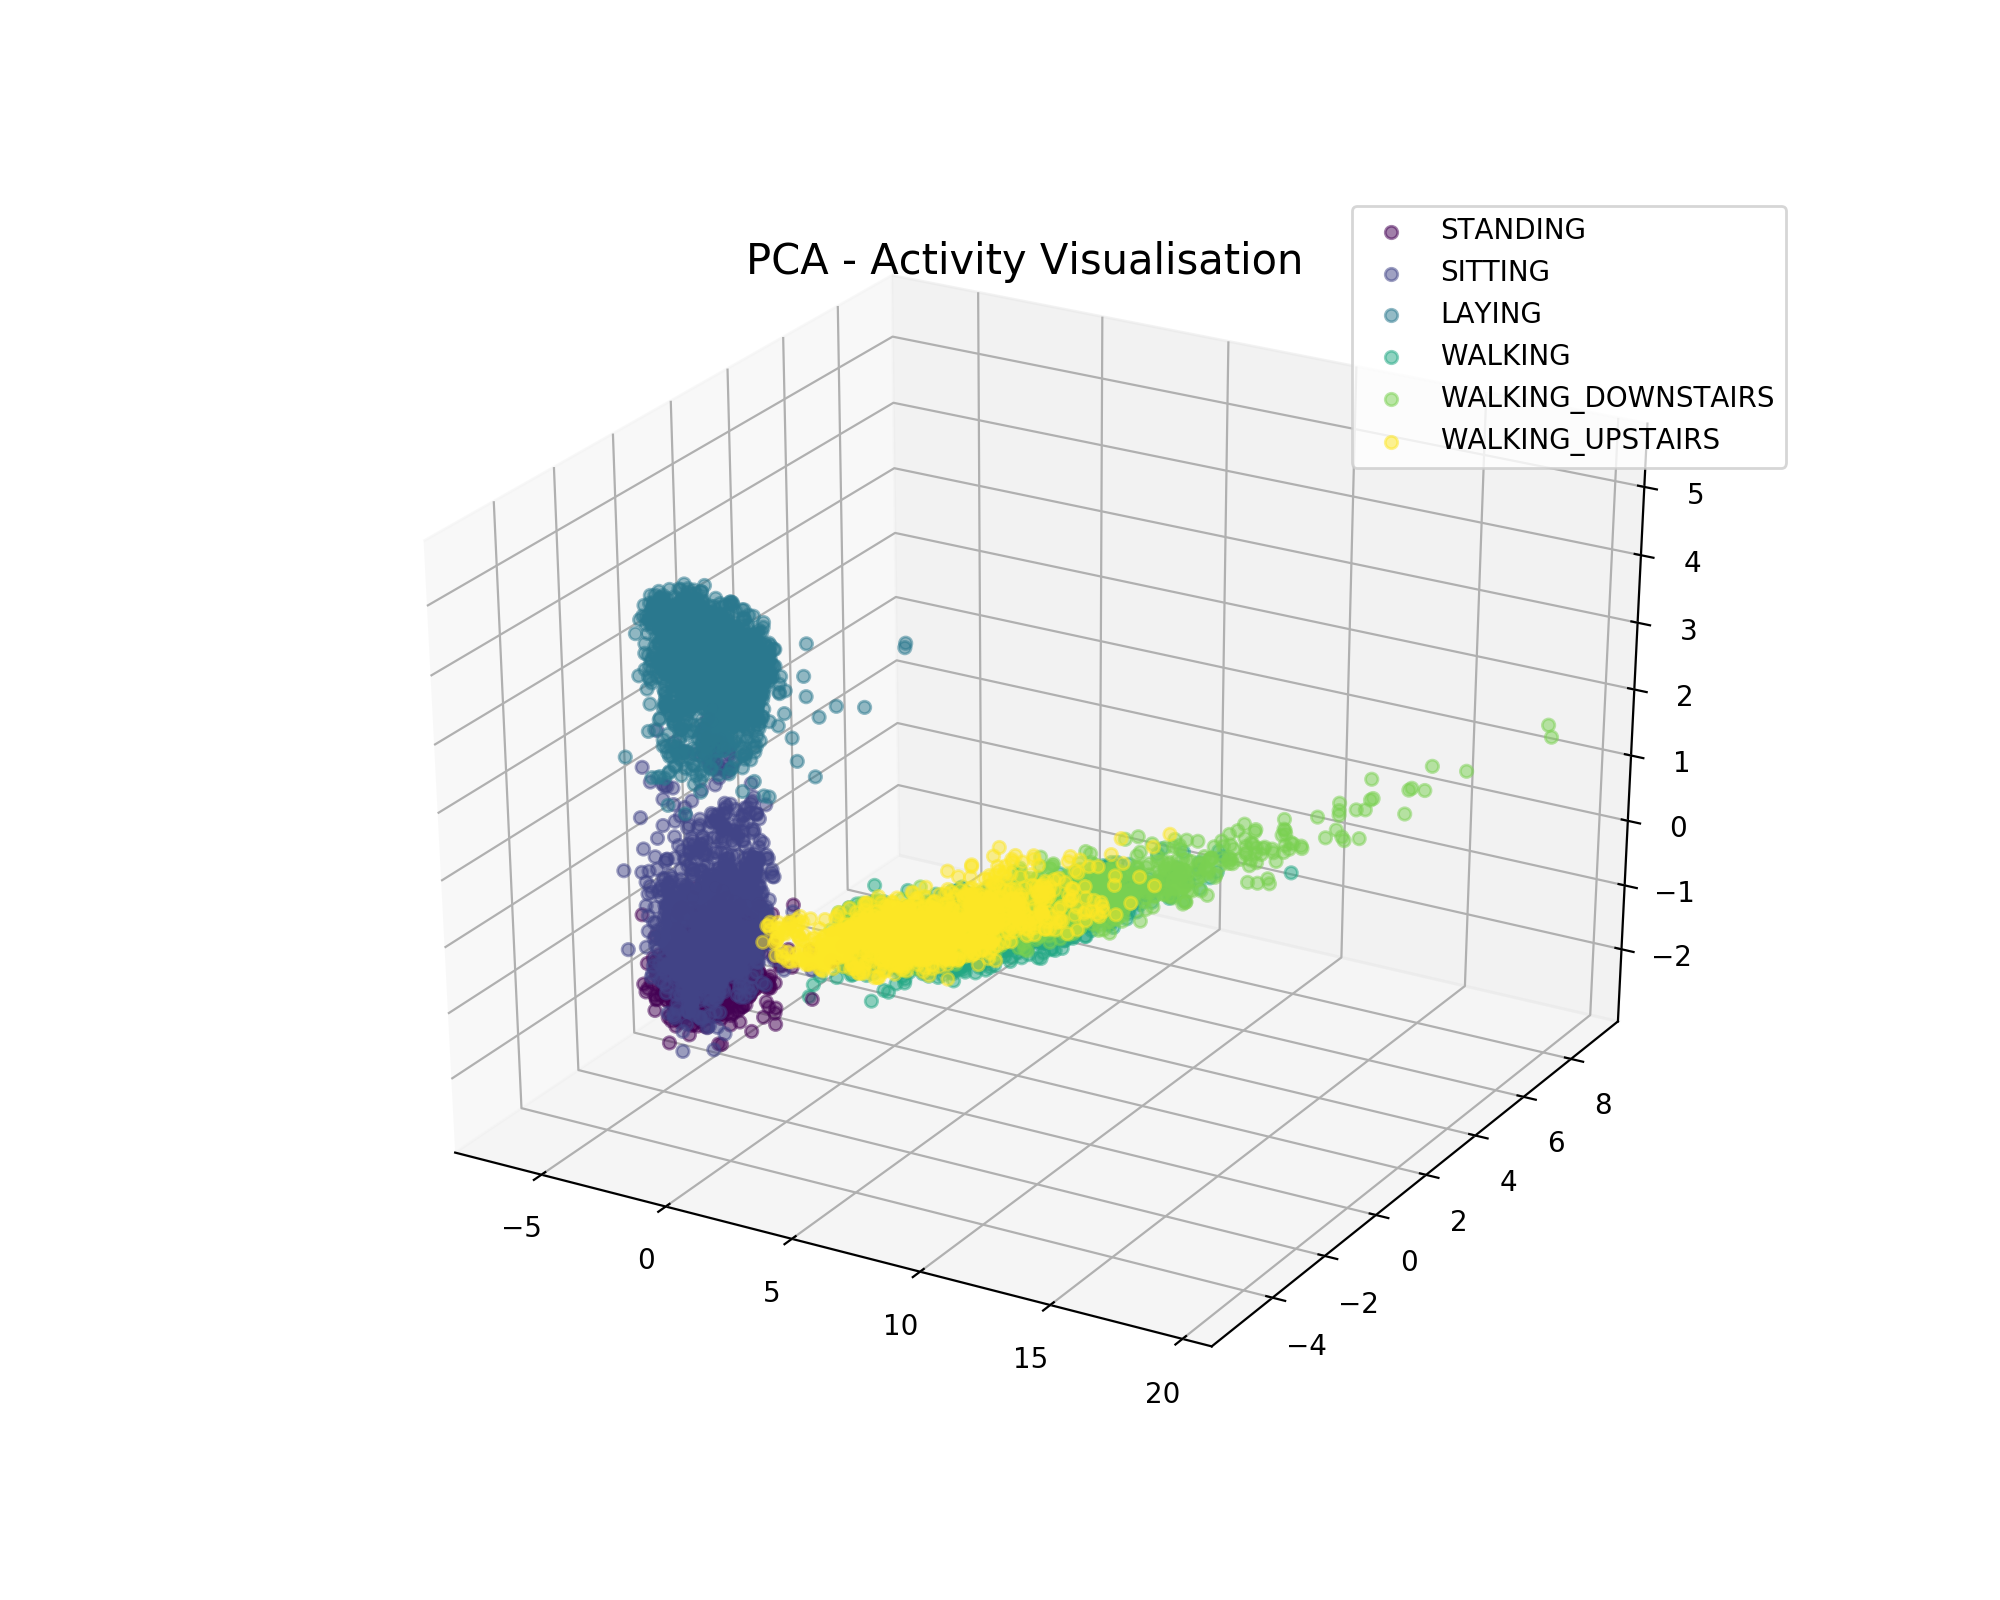

In [65]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

n, uniq = y.nunique(), y.unique()
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.linspace(0,1,n)]

for i, group in enumerate(uniq):
    cond = (y == group).values
    curr_data = pca_data[cond].copy()
    ax.scatter(curr_data['pca_1'], # x-axis
               curr_data['pca_2'], # y-axis
               curr_data['pca_3'], # z-axis
               c=colors[i],
               alpha=0.5, 
               label=group
              )
    
ax.set_title('PCA - Activity Visualisation', {'fontsize':15})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

## t-SNE

[Top](#Navigation)

We first apply t-SNE on the original data. This might take a while to run:

“Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical (and the memory requirements become too large)”.

In [66]:
seed = 123
perplexity = 40
n_components = 3

tsne = TSNE(n_components=n_components, random_state=seed, perplexity=perplexity)
tsne_data = pd.DataFrame(tsne.fit_transform(X), 
                        columns = ['tsne_%d' % (i+1) for i in range(n_components)])

<IPython.core.display.Javascript object>


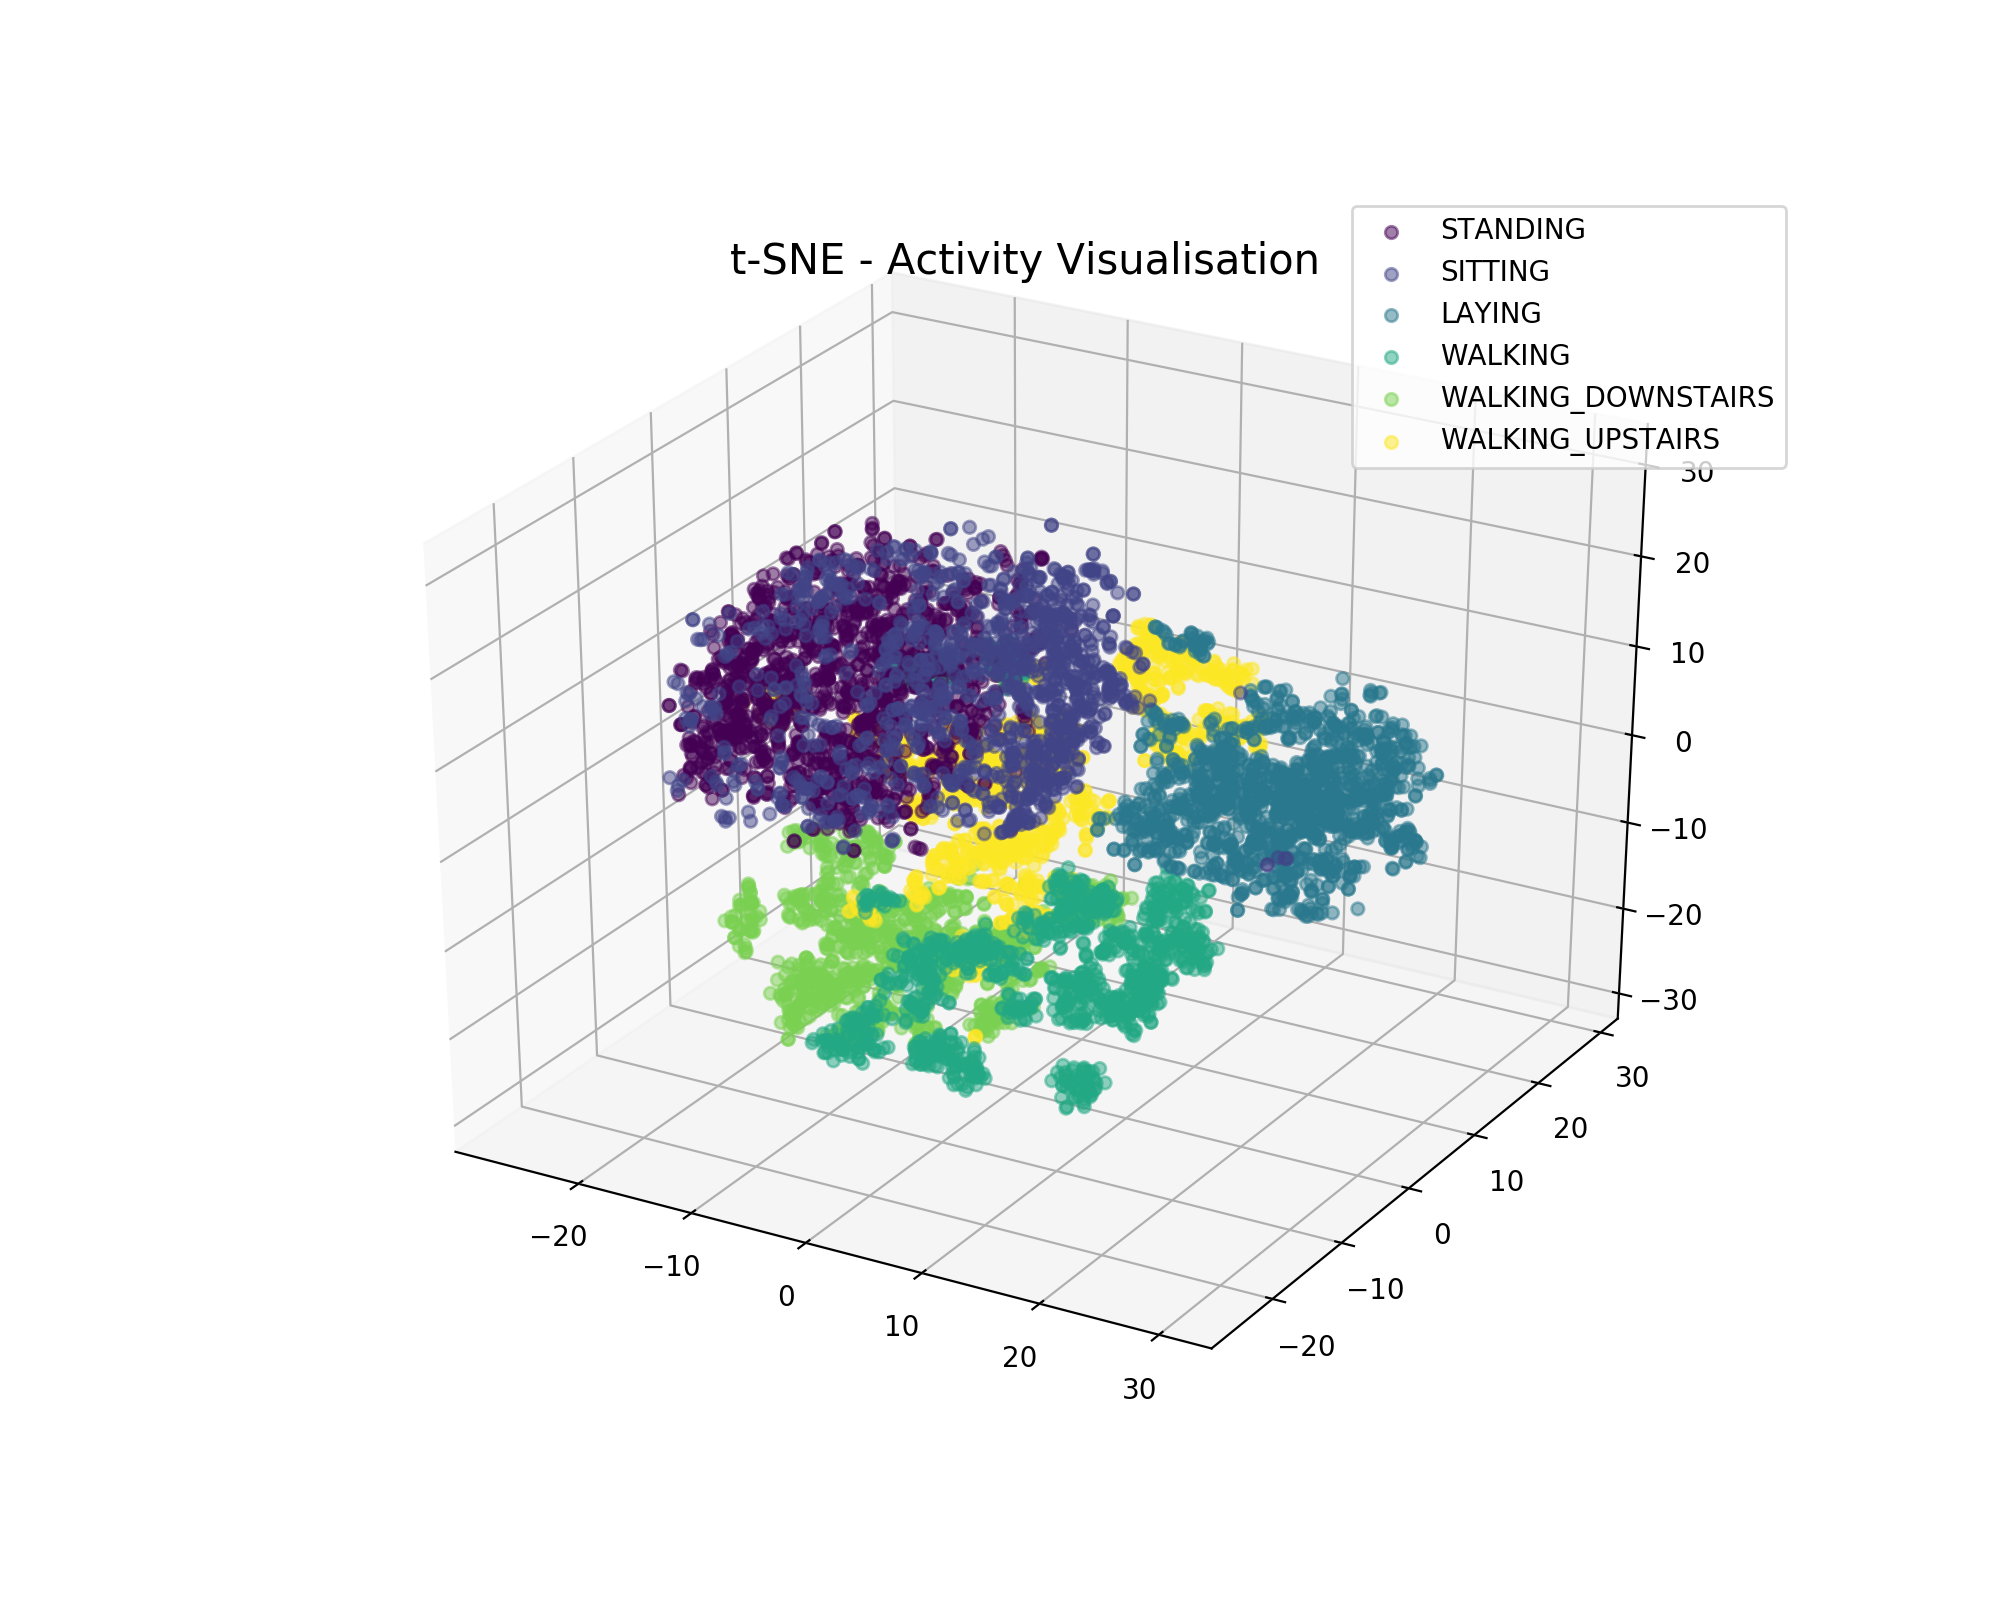

In [67]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, group in enumerate(uniq):
    cond = (y == group).values
    curr_data = tsne_data[cond].copy()
    ax.scatter(curr_data['tsne_1'], # x-axis
               curr_data['tsne_2'], # y-axis
               curr_data['tsne_3'], # z-axis
               c=colors[i],
               alpha=0.5, 
               label=group
              )
    
ax.set_title('t-SNE - Activity Visualisation', {'fontsize':15})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

## PCA + t-SNE

[Top](#Navigation)

We now use PCA as a prior step to the t-SNE.

In [68]:
pca = PCA(n_components=50)
pca_X = pca.fit_transform(X)

seed = 123
perplexity = 40
n_components = 3

tsne = TSNE(n_components=n_components, random_state=seed, perplexity=perplexity)
tsne_data = pd.DataFrame(tsne.fit_transform(pca_X), 
                        columns = ['tsne_%d' % (i+1) for i in range(n_components)])

<IPython.core.display.Javascript object>


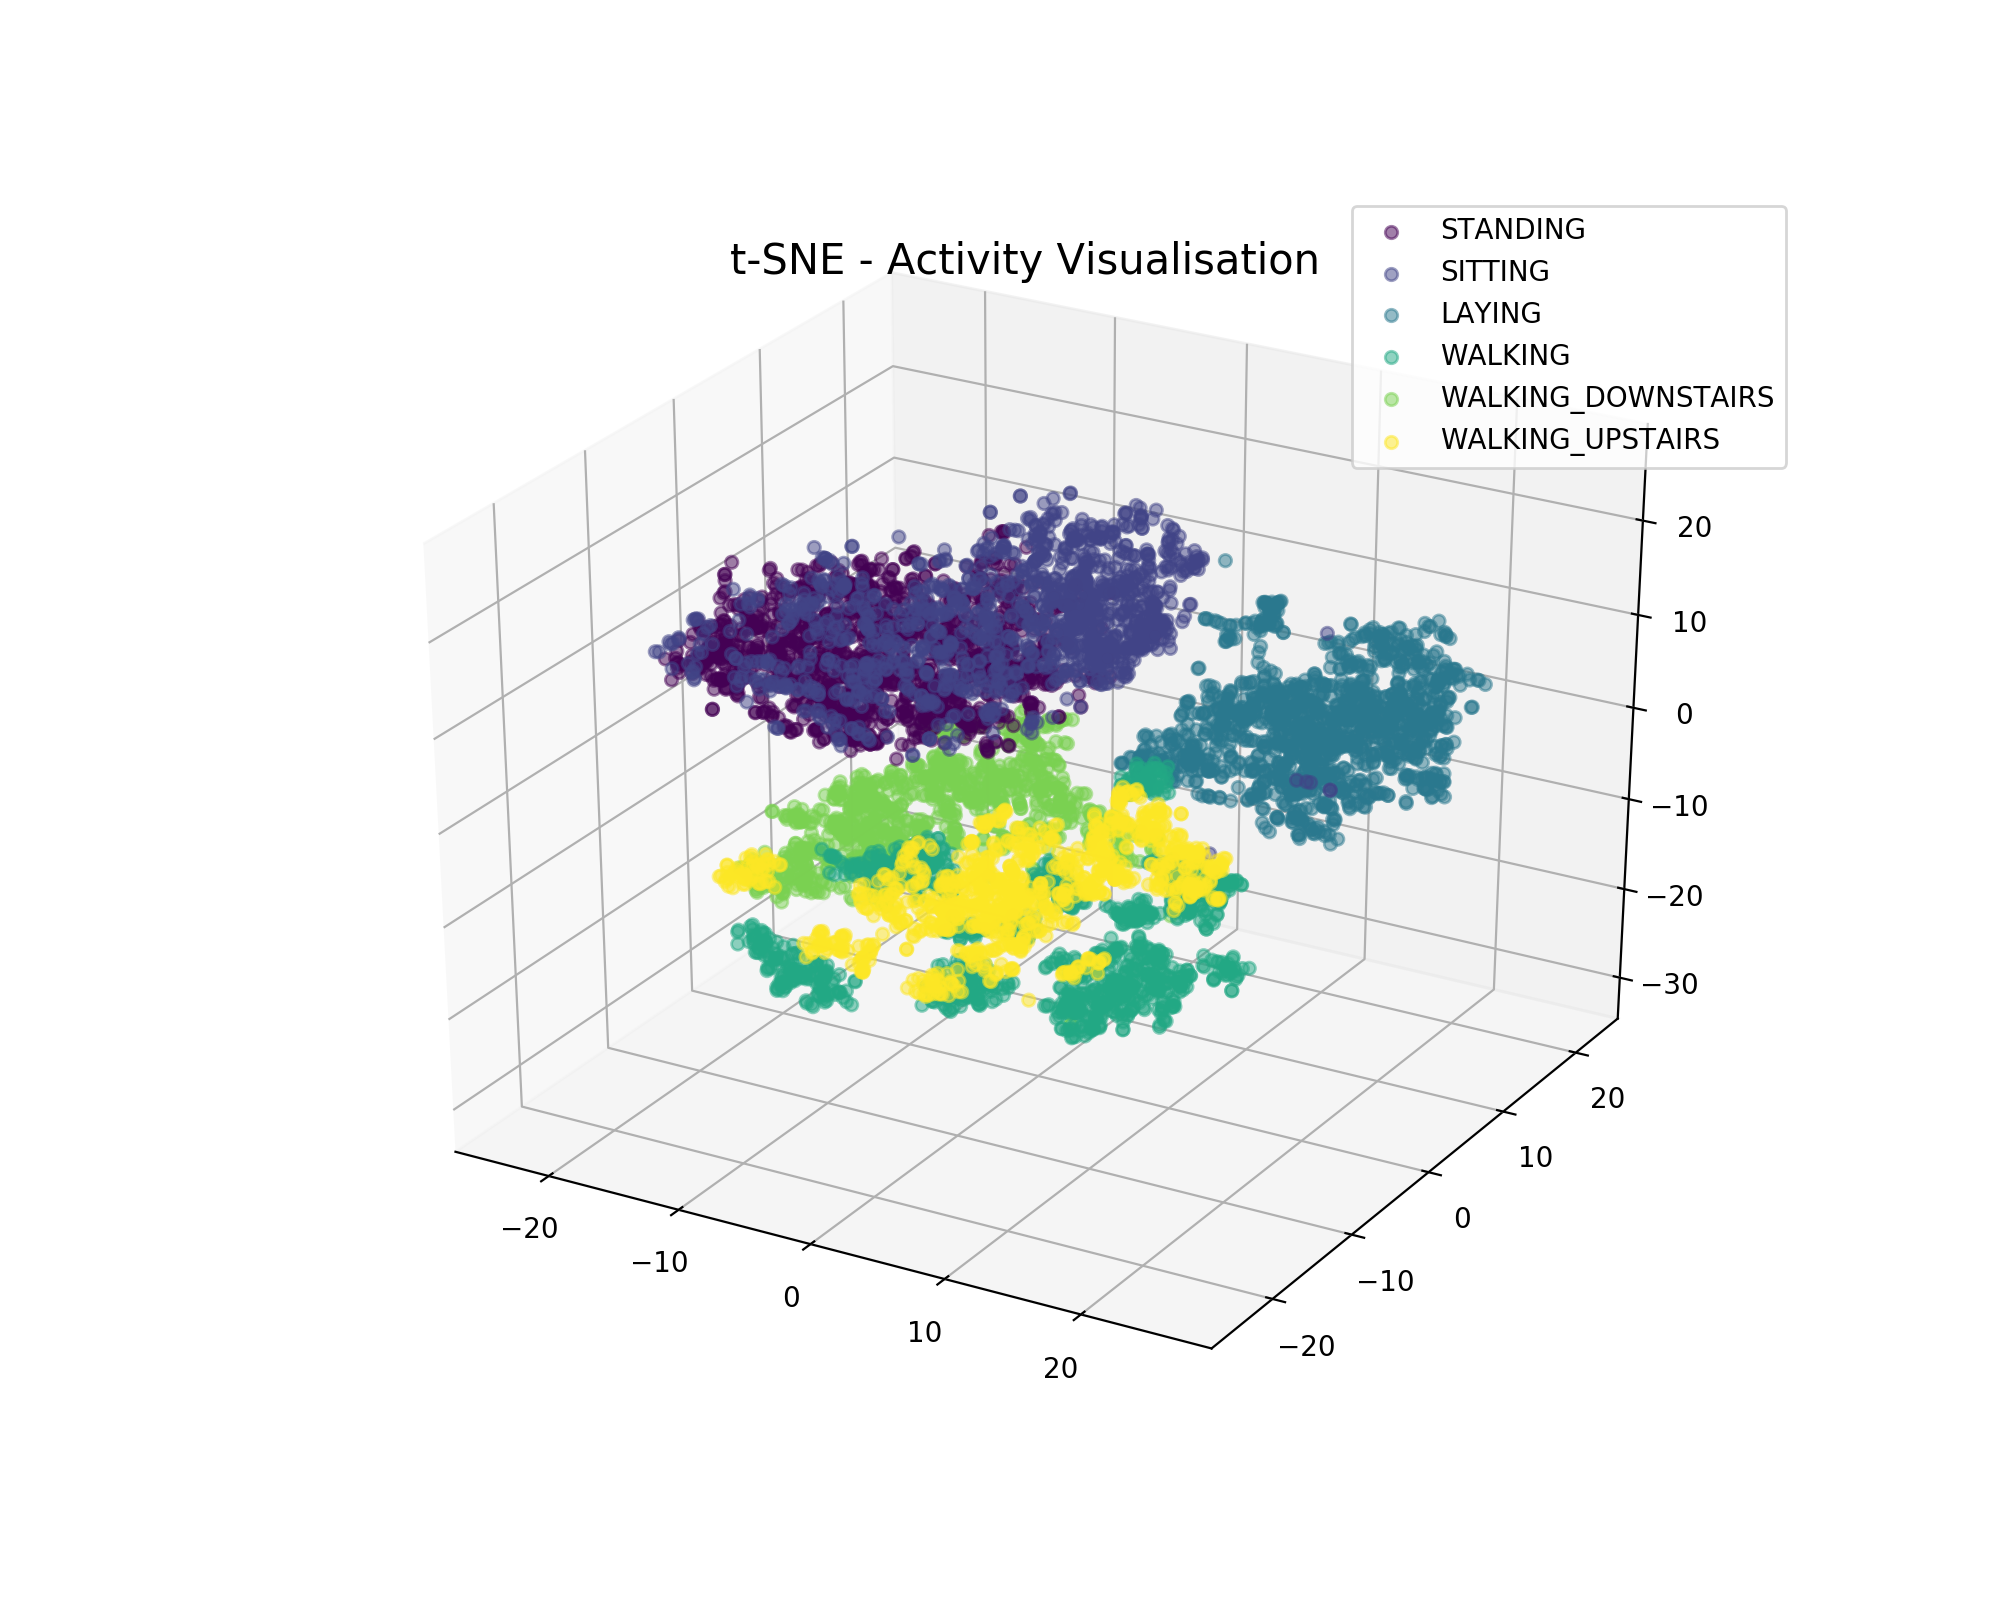

In [69]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, group in enumerate(uniq):
    cond = (y == group).values
    curr_data = tsne_data[cond].copy()
    ax.scatter(curr_data['tsne_1'], # x-axis
               curr_data['tsne_2'], # y-axis
               curr_data['tsne_3'], # z-axis
               c=colors[i],
               alpha=0.5, 
               label=group
              )
    
ax.set_title('t-SNE - Activity Visualisation', {'fontsize':15})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

## UMAP

[Top](#Navigation)

In [93]:
seed = 123
n_neighbors = 100
learning_rate = .5
min_dist = 0.75
n_components = 3
embedding = UMAP(n_neighbors=n_neighbors,
                 learning_rate=learning_rate,
                 n_components=n_components,
                 init="random",
                 min_dist=min_dist,
                 random_state = seed)\
                .fit_transform(X)

In [94]:
umap_data = pd.DataFrame(embedding, 
                         columns = ['umap_%d' % (i+1) for i in range(n_components)])

<IPython.core.display.Javascript object>


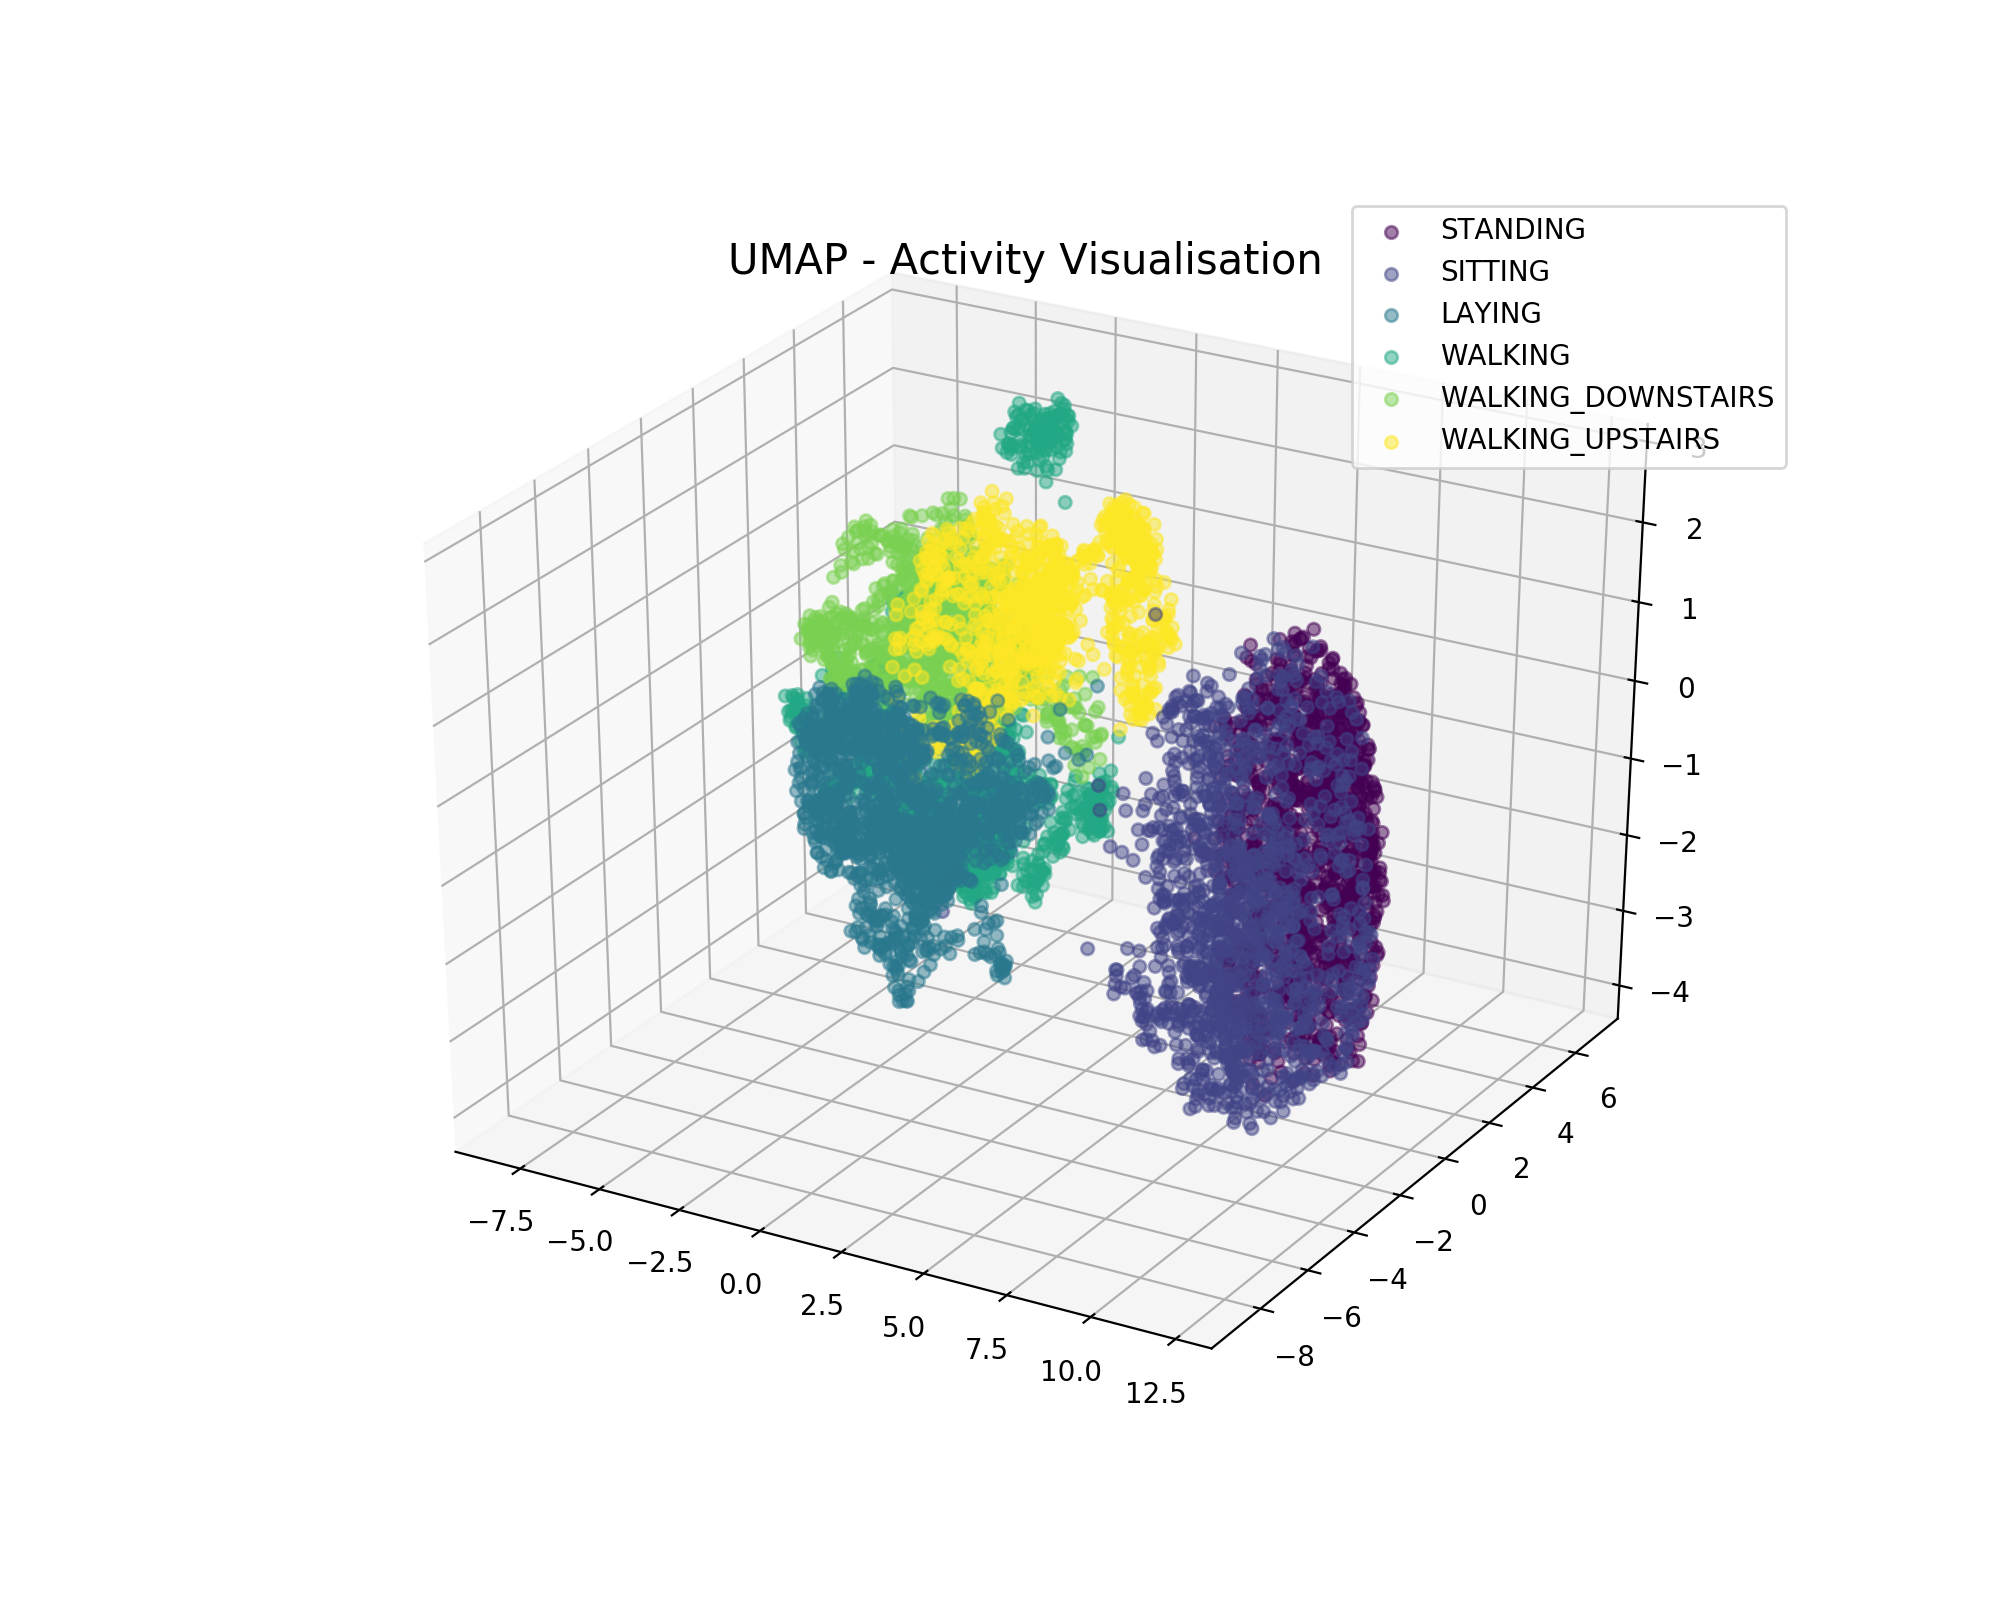

In [95]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, group in enumerate(uniq):
    cond = (y == group).values
    curr_data = umap_data[cond].copy()
    ax.scatter(curr_data['umap_1'], # x-axis
               curr_data['umap_2'], # y-axis
               curr_data['umap_3'], # z-axis
               c=colors[i],
               alpha=0.5, 
               label=group
              )
    
ax.set_title('UMAP - Activity Visualisation', {'fontsize':15})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)